In [1]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#!pip install mplfinance

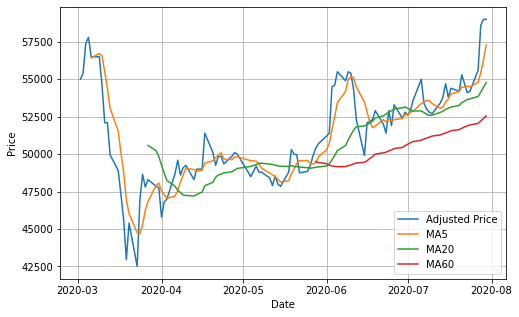

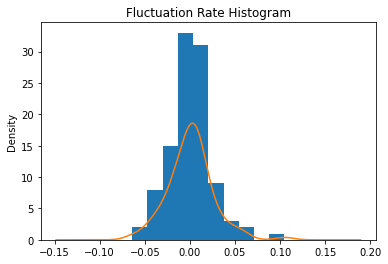

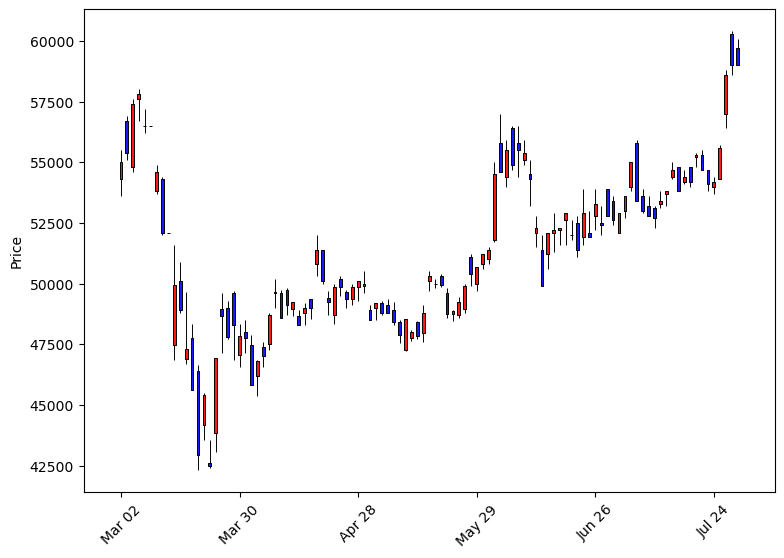

In [3]:

"""
주식 데이터 불러오기
"""
stock = pd.read_csv('./api_data/stock.csv', index_col=0, parse_dates=True)

"""
데이터 살펴보기
"""
# stock.head()
# stock.tail()
# stock.shape
# stock.info()
# stock.dtypes
# stock.columns
# stock.describe()

"""
이동평균선(가격, 거래량) 구하기
"""

ma5 = stock['Adj Close'].rolling(window=5).mean() # 5일 이동평균
ma20 = stock['Adj Close'].rolling(window=20).mean() # 20일 이동평균
ma60 = stock['Adj Close'].rolling(window=60).mean() # 60일 이동평균

vma5 = stock['Volume'].rolling(window=5).mean() # 거래량 5일 이동 평균


stock.insert(len(stock.columns), "MA5", ma5)
stock.insert(len(stock.columns), "MA20", ma20)
stock.insert(len(stock.columns), "MA60", ma60)

stock.insert(len(stock.columns), "VMA5", vma5)


"""
주가 변동률
"""
stock['Tommorow Adj Close'] = stock['Adj Close'].shift(-1) # 내일의 종가
fluctuation = stock['Tommorow Adj Close'] - stock['Adj Close']

stock['Fluctuation Rate'] = fluctuation / stock['Adj Close']



"""
이동평균 시각화
"""
_ = plt.figure(figsize=(8,5))
_ = plt.xlabel('Date')
_ = plt.ylabel('Price')

_ = plt.plot(stock['Adj Close'], label='Adjusted Price')
_ = plt.plot(stock['MA5'], label='MA5')
_ = plt.plot(stock['MA20'], label='MA20')
_ = plt.plot(stock['MA60'], label='MA60')

_ = plt.legend(loc='best')
_ = plt.grid()

plt.show()


"""
변동률 시각화 -- 히스토그램, 캔들챠트
"""

# 히스토그램
_ = stock['Fluctuation Rate'].plot.hist() # 일반 히스토그램
_ = stock['Fluctuation Rate'].plot.kde() # 커널 밀도 함수(KDE)
_ = plt.title('Fluctuation Rate Histogram')
plt.show()

# 캔들 차트

import mplfinance as mpf
import matplotlib.ticker as ticker #matplotlib에서 x축과 y축에 표시되는 값을 ticker라 함
import matplotlib.dates as mdates


mc = mpf.make_marketcolors(up='r',down='b')
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(stock, type='candle', figscale=1.2, style=s)


In [4]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close,MA5,MA20,MA60,VMA5,Tommorow Adj Close,Fluctuation Rate
Date,,,,,,,,,,,,
2020-03-02,55500,53600,54300,55000,30403412,55000,NaN,NaN,NaN,NaN,55400.0,0.007273
2020-03-03,56900,55100,56700,55400,30330295,55400,NaN,NaN,NaN,NaN,57400.0,0.036101
2020-03-04,57600,54600,54800,57400,24765728,57400,NaN,NaN,NaN,NaN,57800.0,0.006969
2020-03-05,58000,56700,57600,57800,21698990,57800,NaN,NaN,NaN,NaN,56500.0,-0.022491
2020-03-06,57200,56200,56500,56500,18716656,56500,56420.0,NaN,NaN,25183016.2,56500.0,0.000000


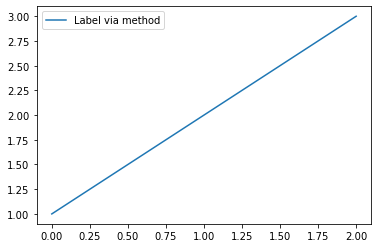

In [15]:
fig,ax = plt.subplots()


line, = ax.plot([1, 2, 3])
line.set_label('Label via method')
ax.legend()

'__main__'